In [ ]:
!wget http://www.eyrignoux.com.fr/coursIA/deepLearning/facial-keypoints-data.zip
!unzip facial-keypoints-data.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/images/03402.jpg   
  inflating: data/images/03284.jpg   
  inflating: data/images/03163.jpg   
  inflating: data/images/03156.jpg   
  inflating: data/images/03120.jpg   
  inflating: data/images/03088.jpg   
  inflating: data/images/03064.jpg   
  inflating: data/images/03046.jpg   
  inflating: data/images/03032.jpg   
  inflating: data/images/02993.jpg   
  inflating: data/images/02939.jpg   
  inflating: data/images/02907.jpg   
  inflating: data/images/02897.jpg   
  inflating: data/images/02884.jpg   
  inflating: data/images/02811.jpg   
  inflating: data/images/02807.jpg   
  inflating: data/images/02801.jpg   
  inflating: data/images/02700.jpg   
  inflating: data/images/02667.jpg   
  inflating: data/images/02568.jpg   
  inflating: data/images/02521.jpg   
  inflating: data/images/02515.jpg   
  inflating: data/images/02510.jpg   
  inflating: data/images/02465.jpg   
  inflatin

In [ ]:
import pandas as pd
from os.path import isfile, join
df = pd.read_csv(join('data', 'gt.csv'))


In [ ]:
df

,filename,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14
0,00000.jpg,51,51,127,60,169,65,203,52,68,77,85,75,110,82,160,87,171,79,193,84,156,144,92,174,140,180,168,179
1,00001.jpg,21,20,36,18,57,19,80,25,23,27,34,26,40,28,59,30,68,30,78,33,43,46,31,61,45,66,60,65
2,00002.jpg,23,116,39,83,47,57,56,19,36,115,40,96,47,87,59,60,59,41,62,31,91,86,106,122,115,100,121,81
3,00003.jpg,29,18,63,25,84,32,105,34,38,31,48,34,59,39,79,44,85,43,95,45,72,71,46,83,63,87,75,89
4,00004.jpg,31,53,76,44,107,38,136,33,40,67,52,62,73,64,104,58,115,50,129,49,111,105,72,137,106,132,126,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,05995.jpg,22,31,41,25,80,25,100,25,30,45,41,42,52,42,80,42,94,42,97,42,69,70,47,92,58,95,75,89
5996,05996.jpg,31,37,39,37,59,28,98,17,36,45,39,45,39,45,90,42,106,34,109,34,84,70,70,104,87,106,90,104
5997,05997.jpg,21,33,41,33,83,30,100,28,47,50,55,47,66,50,97,42,111,44,119,44,86,78,55,114,75,114,94,111
5998,05998.jpg,8,13,17,10,30,10,36,10,11,18,15,17,17,17,31,15,33,15,36,15,28,25,18,36,27,35,34,34


# Load and process data

In [ ]:
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize

def read_image_and_keypoints(filename):
  img = imread(join('data/images',filename))
  if len(img.shape) == 2: #si l'image a une shape de 2, ce qui signifie qu'elle est en n&b 
    img = gray2rgb(img) #il faut la convertir en rgb pour avoir 3 dimmensions
  img_resized = resize(img,(100,100))
  key_points = df[df['filename']==filename_test].copy()

  coord_x = key_points.loc[:, df.columns.str.startswith('x')] #va prendre toutes les coordonnées de x
  coord_x = coord_x/ img.shape[1] - 0.5
  key_points.update(coord_x)

  coord_y = key_points.loc[:, df.columns.str.startswith('y')] #va prendre toutes les coordonnées de y
  coord_y = coord_y/ img.shape[0] - 0.5
  key_points.update(coord_y)

  points = key_points.drop('filename', axis=1).values[0] #suppression de toute la colonne avec filename et x1 x2 ...

  return img_resized, points

In [ ]:
filename_test = df['filename'][11]
filename_test

'00011.jpg'

In [ ]:
read_image_and_keypoints(filename_test)

(array([[[0.08752794, 0.08752794, 0.08752794],
         [0.08399333, 0.08399333, 0.08399333],
         [0.13332059, 0.13332059, 0.13332059],
         ...,
         [0.87480392, 0.87480392, 0.87480392],
         [0.86919608, 0.86919608, 0.86919608],
         [0.86666667, 0.86666667, 0.86666667]],
 
        [[0.05515873, 0.05515873, 0.05515873],
         [0.10013873, 0.10013873, 0.10013873],
         [0.04948725, 0.04948725, 0.04948725],
         ...,
         [0.87480392, 0.87480392, 0.87480392],
         [0.86919608, 0.86919608, 0.86919608],
         [0.86666667, 0.86666667, 0.86666667]],
 
        [[0.09141422, 0.09141422, 0.09141422],
         [0.06737206, 0.06737206, 0.06737206],
         [0.03410539, 0.03410539, 0.03410539],
         ...,
         [0.87480392, 0.87480392, 0.87480392],
         [0.86919608, 0.86919608, 0.86919608],
         [0.86666667, 0.86666667, 0.86666667]],
 
        ...,
 
        [[0.18567402, 0.18567402, 0.18567402],
         [0.11908088, 0.11908088, 0.11908

# Visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib.patches import Circle

import cv2 as cv

In [ ]:
def visualise_points(img, points):
  fig, ax = plt.subplots(1)
  ax.imshow(img)

  for i in range(0, len(points), 2):
    x= int((points[i] +0.5 ) * img.shape[1])
    y= int((points[i+1] +0.5 ) * img.shape[0])

    #x= int((points[i]  )
    #y= int((points[i+1]) 
    circ = Circle((x,y), radius=1, color='r')
    ax.add_patch(circ)
  plt.show()


In [ ]:
img_test, keypoints_test = read_image_and_keypoints(filename_test)

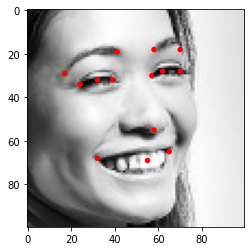

In [ ]:
visualise_points(img_test, keypoints_test)

# Split des datas

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( df['filename'])

# Generation des batch

In [ ]:
from itertools import chain
from itertools import islice

BATCH_SIZE = 32

def batch_generator(filenames, batch_size):
  iterator = iter(filenames)
  for first in iterator:
    yield list(chain([first],islice(iterator, batch_size - 1)))
    #islice('ABCDEFG', 2, None) --> C D E F G7
    #chain('ABC', 'DEF') --> A B C D E F

In [ ]:
a = batch_generator(train_set, BATCH_SIZE)

In [ ]:
print(list(a))

[['01697.jpg', '02742.jpg', '01503.jpg', '05193.jpg', '02923.jpg', '01616.jpg', '01972.jpg', '02156.jpg', '03640.jpg', '00035.jpg', '04544.jpg', '01854.jpg', '02264.jpg', '03017.jpg', '01403.jpg', '02479.jpg', '02179.jpg', '03628.jpg', '03583.jpg', '02761.jpg', '01566.jpg', '05256.jpg', '04343.jpg', '03471.jpg', '04245.jpg', '01949.jpg', '04068.jpg', '05300.jpg', '02884.jpg', '04260.jpg', '03206.jpg', '05341.jpg'], ['02698.jpg', '02618.jpg', '01246.jpg', '02766.jpg', '02942.jpg', '03524.jpg', '05070.jpg', '01700.jpg', '03561.jpg', '00064.jpg', '02793.jpg', '04074.jpg', '01705.jpg', '02590.jpg', '04551.jpg', '04573.jpg', '04718.jpg', '02088.jpg', '02288.jpg', '04589.jpg', '04181.jpg', '02340.jpg', '00650.jpg', '01557.jpg', '04355.jpg', '02781.jpg', '01966.jpg', '02080.jpg', '05233.jpg', '03141.jpg', '04729.jpg', '03954.jpg'], ['00462.jpg', '02333.jpg', '02522.jpg', '02247.jpg', '05700.jpg', '00295.jpg', '00083.jpg', '03830.jpg', '04585.jpg', '04572.jpg', '05728.jpg', '03627.jpg', '05049

In [ ]:
for batch in batch_generator(train_set, BATCH_SIZE):
  for filename in batch:
    print(filename)

01633.jpg
04810.jpg
02527.jpg
00338.jpg
02854.jpg
00687.jpg
04365.jpg
02837.jpg
03613.jpg
00244.jpg
04070.jpg
03876.jpg
05318.jpg
02229.jpg
04361.jpg
04590.jpg
05555.jpg
05405.jpg
00842.jpg
05890.jpg
01149.jpg
05352.jpg
03517.jpg
00515.jpg
01156.jpg
03271.jpg
01469.jpg
05594.jpg
02651.jpg
01235.jpg
02142.jpg
02190.jpg
01697.jpg
02742.jpg
01503.jpg
05193.jpg
02923.jpg
01616.jpg
01972.jpg
02156.jpg
03640.jpg
00035.jpg
04544.jpg
01854.jpg
02264.jpg
03017.jpg
01403.jpg
02479.jpg
02179.jpg
03628.jpg
03583.jpg
02761.jpg
01566.jpg
05256.jpg
04343.jpg
03471.jpg
04245.jpg
01949.jpg
04068.jpg
05300.jpg
02884.jpg
04260.jpg
03206.jpg
05341.jpg
02698.jpg
02618.jpg
01246.jpg
02766.jpg
02942.jpg
03524.jpg
05070.jpg
01700.jpg
03561.jpg
00064.jpg
02793.jpg
04074.jpg
01705.jpg
02590.jpg
04551.jpg
04573.jpg
04718.jpg
02088.jpg
02288.jpg
04589.jpg
04181.jpg
02340.jpg
00650.jpg
01557.jpg
04355.jpg
02781.jpg
01966.jpg
02080.jpg
05233.jpg
03141.jpg
04729.jpg
03954.jpg
00462.jpg
02333.jpg
02522.jpg
02247.jpg


In [ ]:
a,b = train_generator(train_set)

In [ ]:
a.shape

(1, 100, 100, 3)

In [ ]:
b.shape

(1, 28)

In [ ]:
b,a = train_generator(train_set)

KeyboardInterrupt: ignored

In [ ]:
print(list(b))

[array([[[[0.21562275, 0.17261971, 0.15956696],
         [0.19368078, 0.15086637, 0.13947559],
         [0.14091667, 0.09885343, 0.09125   ],
         ...,
         [0.01506324, 0.0072201 , 0.01114167],
         [0.01869676, 0.01085363, 0.0147752 ],
         [0.02092461, 0.01308147, 0.01700304]],

        [[0.20591608, 0.16310167, 0.15171088],
         [0.1860949 , 0.14373422, 0.1334752 ],
         [0.13862255, 0.09765539, 0.08997549],
         ...,
         [0.01804559, 0.01020245, 0.01412402],
         [0.02232147, 0.01447833, 0.0183999 ],
         [0.02481441, 0.01697127, 0.02089284]],

        [[0.18245049, 0.14038725, 0.13254412],
         [0.16784461, 0.12687745, 0.11903431],
         [0.13342402, 0.09534069, 0.08749755],
         ...,
         [0.025     , 0.01715686, 0.02107843],
         [0.03048382, 0.02264069, 0.02656225],
         [0.03346618, 0.02562304, 0.02954461]],

        ...,

        [[0.18305147, 0.1046201 , 0.0694348 ],
         [0.16584559, 0.08741422, 0.05238186

In [ ]:
for imgs, keypoints in train_generator2(train_set):
  for img, keypoint in zip(imgs, keypoints):
    visualise_points(img, keypoint)
  break
  


In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(MaxPooling2D(pool_size = (2,2)))    
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))    
model.add(Conv2D(filters=128, kernel_size=2, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
    
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(28))  
 
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.fit(train_generator(train_set), epochs=8, validation_data = (train_generator(test_set)))

In [ ]:
filenames = test_set.sample(10).values